### **Project Title : Food Delivery Time Prediction**

### **Problem Statement:**
In this project, we aim to build a machine learning model to predict food delivery times based on various factors such as restaurant location, order preparation time, delivery distance, traffic conditions, and weather. Accurate delivery time predictions are crucial for food delivery platforms to improve customer satisfaction, optimize logistics, and streamline operational efficiency. By analyzing these factors, we aim to create data-driven solutions to enhance the accuracy of delivery time estimates and support better decision-making for delivery platforms, restaurants, and couriers.

## **Data Description:**
The data set contains delivery person information (ID, age, rating, type of vehicle, type of order, and time taken) and location (longitude and latitude).

**Attribute Information:**

**Order ID:** Unique identifier for each order.

**Delivery Partner ID:** Unique identifier for the delivery partner.

**Delivery Partner Age:** Age of the assigned delivery partner.

**Delivery Partner Ratings:** Ratings based on past deliveries.

**Restaurant Latitude & Longitude:** Geographic coordinates of the restaurant.

**Delivery Location Latitude & Longitude:** Geographic coordinates of the delivery destination.

**Order Type:** Category of the meal requested by the customer.

**Vehicle Type:** The mode of transport used by the delivery partner.

**Delivery Time (minutes):** Time taken to complete the order delivery. the order the order

#### Importing Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### Importing Dataset

In [184]:
# Import Dataset
df = pd.read_csv('train1.csv')

In [186]:
#Representing the Data
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle Time_taken(min)  \
0                    75.912471        Snack      motorcycle         (min) 24   
1                    77.813237        Snack         scooter         (min) 33   
2                    77.688400       Drinks      motorcycle         (min) 26   
3                    77.026494       Buffet      motorcycle         (min) 21   
4                    80.289982        Snack         scooter         (min) 30   

       Weatherconditions Road_traffic_density  Vehicle_condition  Order_Date  \
0       conditions Sunny                High                   2  19-03-2022   
1      conditions Stormy                 Jam                   2  25-03-2022   
2  conditions Sandstorms                 Low                   0  19-03-2022   
3       conditions Sunny              Medium                   0  05-04-2022   
4      conditions Cloudy                High                   1  26-03-2022   

  Time_Order_picked multiple_deliveries Festival            City Time_Orderd  
0          11:45:00                   0      No           Urban     11:30:00  
1          19:50:00                   1      No   Metropolitian     19:45:00  
2          08:45:00                   1      No           Urban     08:30:00  
3          18:10:00                   1      No   Metropolitian     18:00:00  
4          13:45:00                   1      No   Metropolitian     13:30:00

In [188]:
# Shape of Data
df.shape

(45593, 20)

In [190]:
# Information of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [192]:
# Describing the Data
print(df.describe(include='all'))

             ID Delivery_person_ID Delivery_person_Age  \
count     45593              45593               45593   
unique    45593               1320                  23   
top     0x4607     PUNERES01DEL01                   35   
freq          1                 67                2262   
mean        NaN                NaN                 NaN   
std         NaN                NaN                 NaN   
min         NaN                NaN                 NaN   
25%         NaN                NaN                 NaN   
50%         NaN                NaN                 NaN   
75%         NaN                NaN                 NaN   
max         NaN                NaN                 NaN   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
count                    45593         45593.000000          45593.000000   
unique                      29                  NaN                   NaN   
top                        4.8                  NaN                   Na

In [193]:
# Replacing the String NAN values to actual NAN
df.replace({"NaN": np.nan}, regex=True, inplace = True)

In [194]:
print(df.describe(include='all'))

             ID Delivery_person_ID Delivery_person_Age  \
count     45593              45593               43739   
unique    45593               1320                  22   
top     0x4607     PUNERES01DEL01                   35   
freq          1                 67                2262   
mean        NaN                NaN                 NaN   
std         NaN                NaN                 NaN   
min         NaN                NaN                 NaN   
25%         NaN                NaN                 NaN   
50%         NaN                NaN                 NaN   
75%         NaN                NaN                 NaN   
max         NaN                NaN                 NaN   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
count                    43685         45593.000000          45593.000000   
unique                      28                  NaN                   NaN   
top                        4.8                  NaN                   Na

In [195]:
df.drop('ID',axis=1,inplace=True)

In [196]:
print(df.isnull().sum())

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Type_of_order                     0
Type_of_vehicle                   0
Time_taken(min)                   0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Order_Date                        0
Time_Order_picked                 0
multiple_deliveries             993
Festival                        228
City                           1200
Time_Orderd                    1731
dtype: int64


In [197]:
(df.isnull().sum() / len(df)) * 100

Delivery_person_ID             0.000000
Delivery_person_Age            4.066414
Delivery_person_Ratings        4.184853
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
Time_taken(min)                0.000000
Weatherconditions              1.351085
Road_traffic_density           1.318185
Vehicle_condition              0.000000
Order_Date                     0.000000
Time_Order_picked              0.000000
multiple_deliveries            2.177966
Festival                       0.500077
City                           2.631983
Time_Orderd                    3.796635
dtype: float64

In [199]:
df_cleaned = df.dropna()
df.dropna(inplace=True)

In [200]:
print(df.isnull().sum())

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Order_Date                     0
Time_Order_picked              0
multiple_deliveries            0
Festival                       0
City                           0
Time_Orderd                    0
dtype: int64


In [208]:
print("\nData after cleaning:")
print(df_cleaned.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           41368 non-null  object 
 1   Delivery_person_Age          41368 non-null  object 
 2   Delivery_person_Ratings      41368 non-null  object 
 3   Restaurant_latitude          41368 non-null  float64
 4   Restaurant_longitude         41368 non-null  float64
 5   Delivery_location_latitude   41368 non-null  float64
 6   Delivery_location_longitude  41368 non-null  float64
 7   Type_of_order                41368 non-null  object 
 8   Type_of_vehicle              41368 non-null  object 
 9   Time_taken(min)              41368 non-null  object 
 10  Weatherconditions            41368 non-null  object 
 11  Road_traffic_density         41368 non-null  object 
 12  Vehicle_condition            41368 non-null  int64  
 13 

In [210]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)','')
df=df.rename(columns={'Time_taken(min)':'Time_taken'})
df['Time_taken'] =df['Time_taken'].astype(int)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           41368 non-null  object 
 1   Delivery_person_Age          41368 non-null  object 
 2   Delivery_person_Ratings      41368 non-null  object 
 3   Restaurant_latitude          41368 non-null  float64
 4   Restaurant_longitude         41368 non-null  float64
 5   Delivery_location_latitude   41368 non-null  float64
 6   Delivery_location_longitude  41368 non-null  float64
 7   Type_of_order                41368 non-null  object 
 8   Type_of_vehicle              41368 non-null  object 
 9   Time_taken                   41368 non-null  int32  
 10  Weatherconditions            41368 non-null  object 
 11  Road_traffic_density         41368 non-null  object 
 12  Vehicle_condition            41368 non-null  int64  
 13  Order_Date           

In [214]:
#numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Numeric columns:", numeric_columns)

Numeric columns: ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_taken', 'Vehicle_condition']


#### Detecting Outliers

In [217]:
# Outlier detection using IQR
def find_outliers_IQR(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

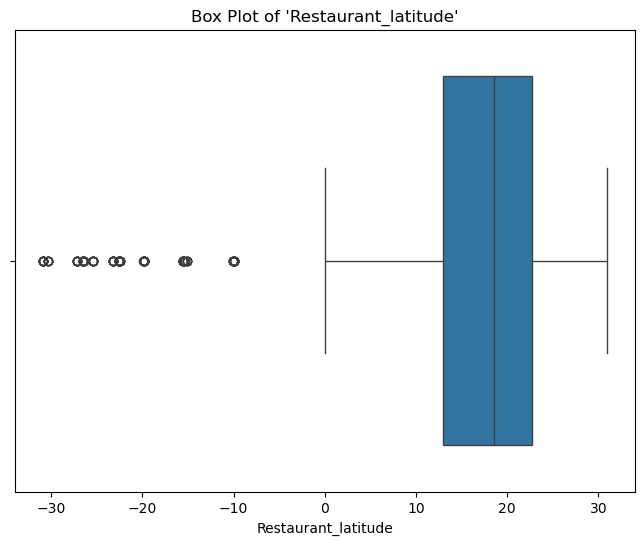

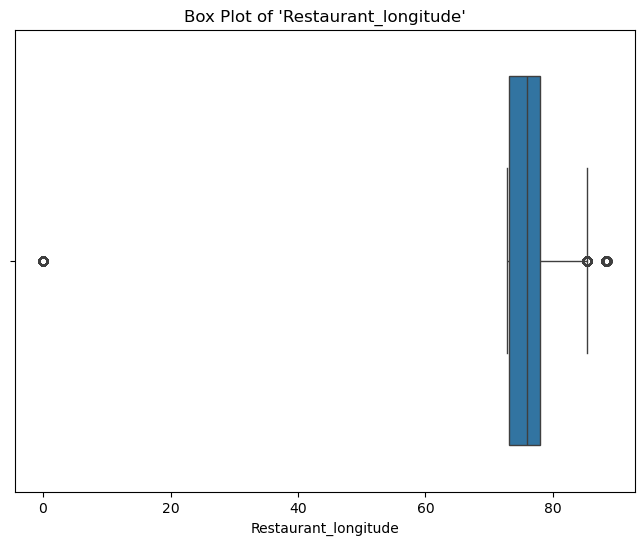

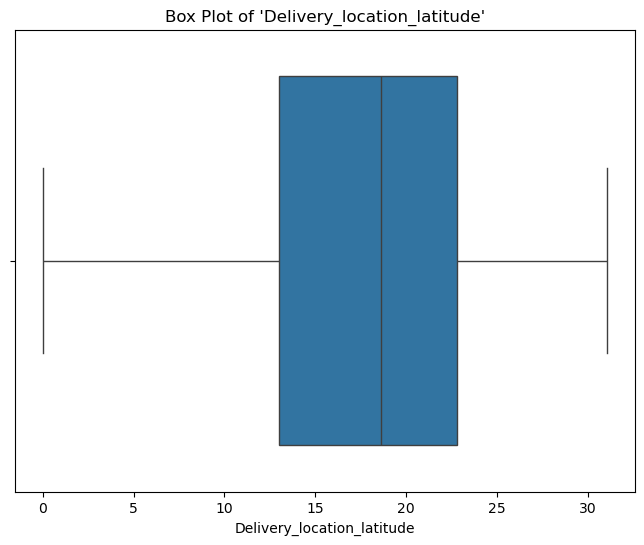

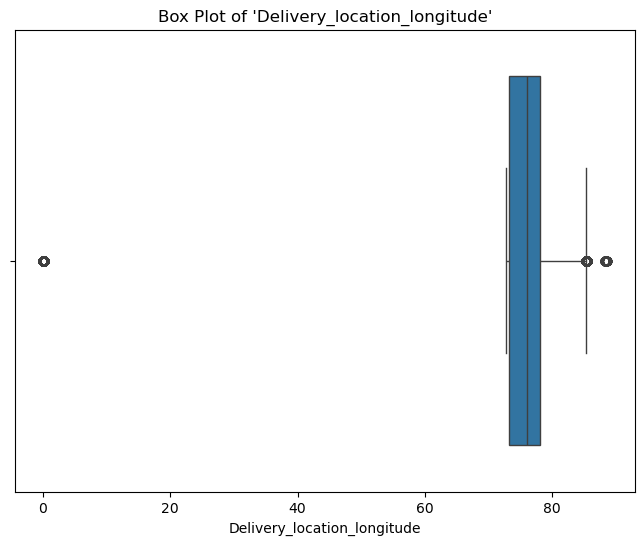

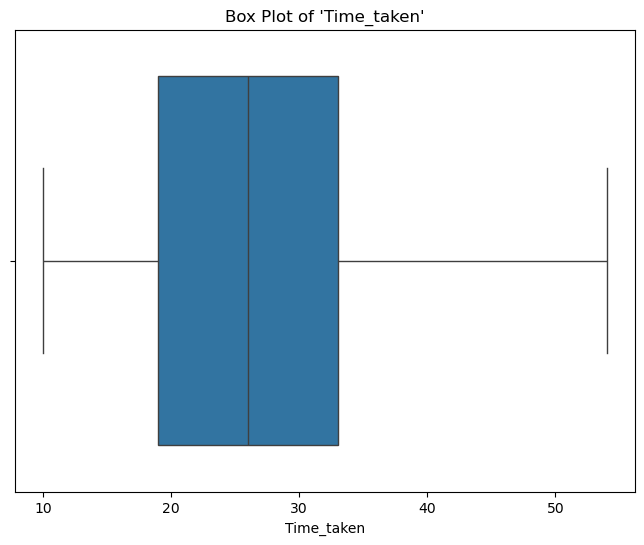

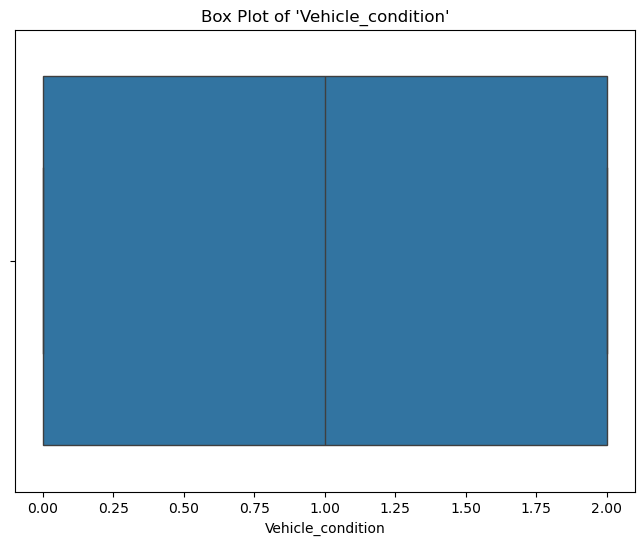

In [219]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])  # Use the actual column name
    plt.title(f"Box Plot of '{column}'")
    plt.show()

In [249]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate the distance between each pair of points
df['distance'] = np.nan

# Use df.index to iterate through the actual index values
for index in df.index:
    df.loc[index, 'distance'] = distcalculate(df.loc[index, 'Restaurant_latitude'],
                                               df.loc[index, 'Restaurant_longitude'],
                                               df.loc[index, 'Delivery_location_latitude'],
                                               df.loc[index, 'Delivery_location_longitude'])

In [250]:
print(df.head())

  Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0    INDORES13DEL02                   37                     4.9   
1    BANGRES18DEL02                   34                     4.5   
2    BANGRES19DEL01                   23                     4.4   
3   COIMBRES13DEL02                   38                     4.7   
4    CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0             0.713886              0.242167                    0.721360   
1            -0.564449              0.326949                   -0.603708   
2            -0.564290              0.326720                   -0.619896   
3            -0.812701              0.293489                   -0.874851   
4            -0.556680              0.448470                   -0.607830   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken  \
0                     0.240087        Snack      motorcycl

#### Distribution of Time Taken for Delivery

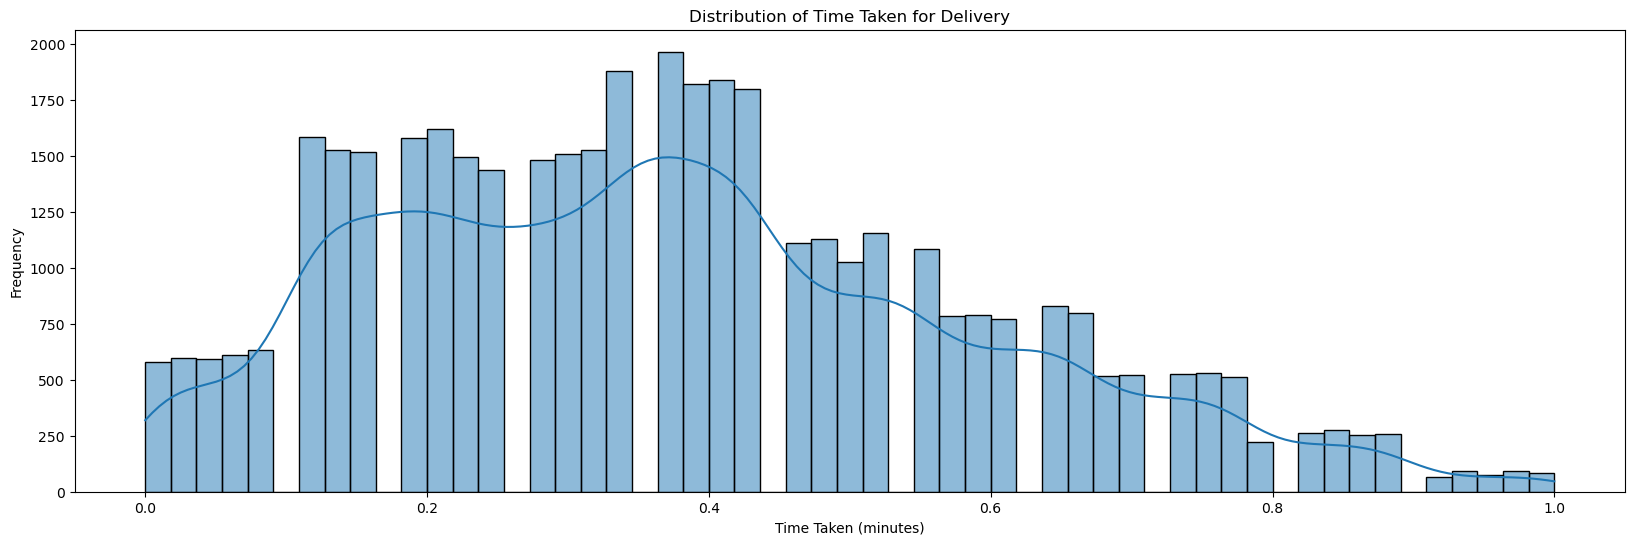

In [359]:
plt.figure(figsize=(20, 6))
sns.histplot(df['Time_taken'], kde=True)
plt.title('Distribution of Time Taken for Delivery')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

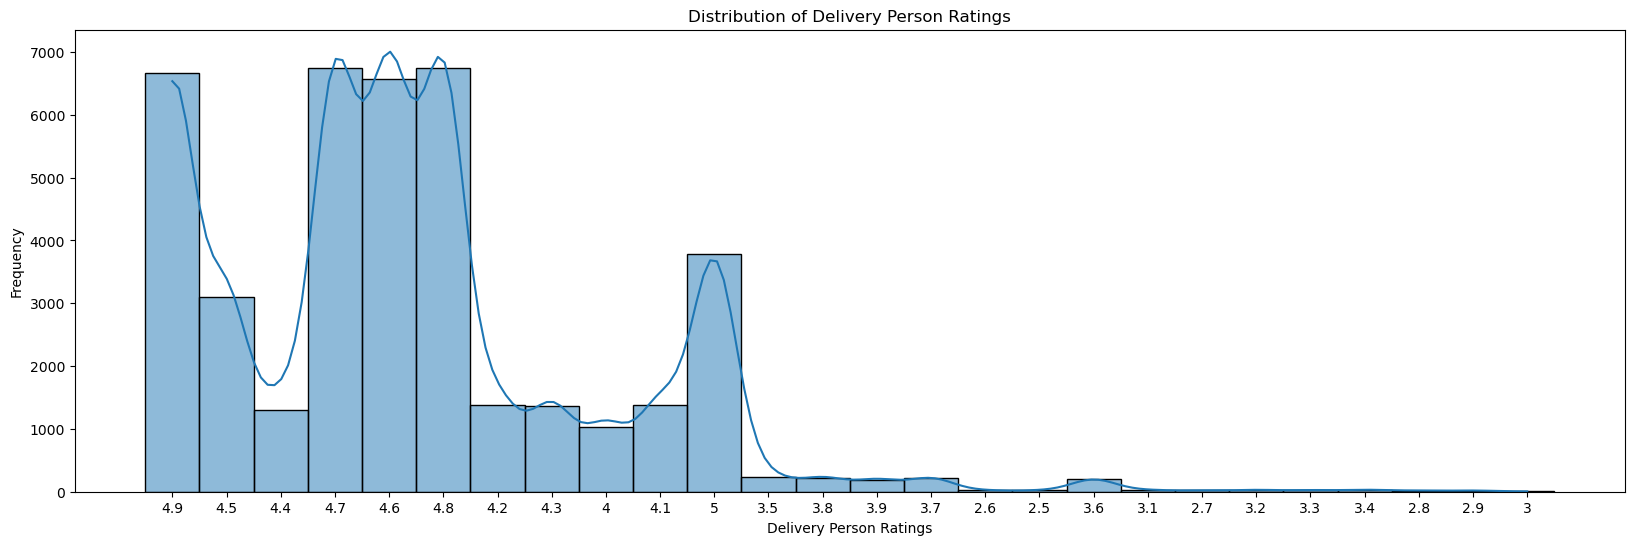

In [257]:
# Distribution plot for 'Delivery_person_Ratings'
plt.figure(figsize=(20, 6))
sns.histplot(df['Delivery_person_Ratings'], kde=True)
plt.title('Distribution of Delivery Person Ratings')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Frequency')
plt.show()

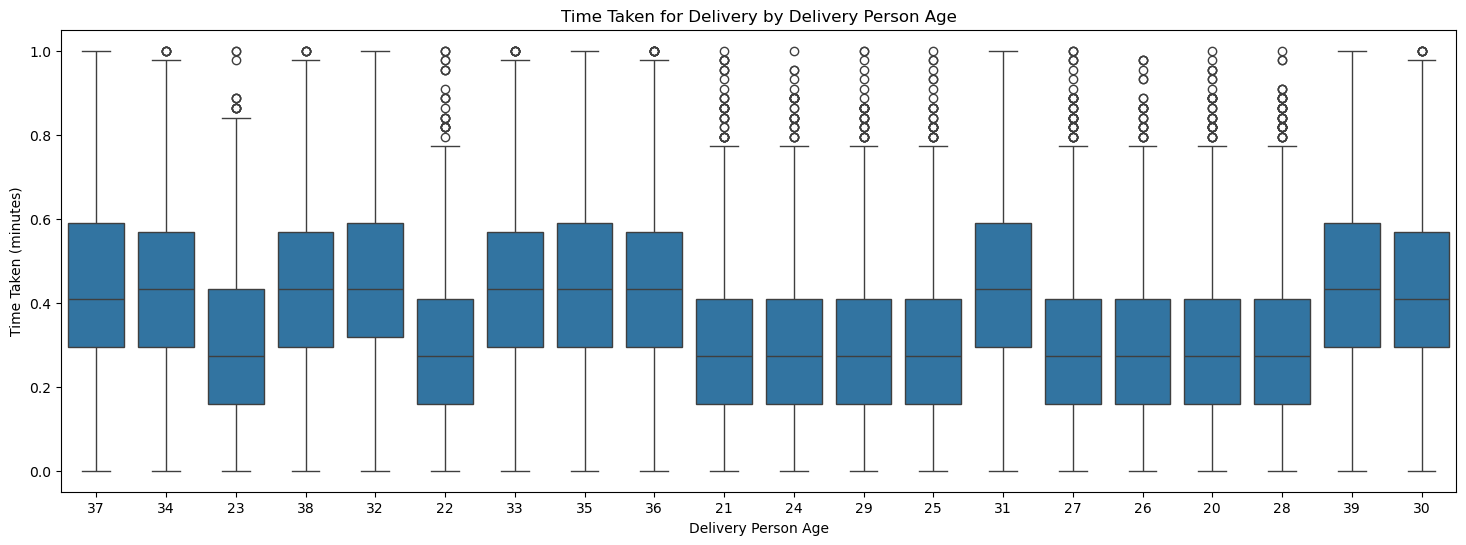

In [258]:
# Box plot of time taken for different delivery person age groups
plt.figure(figsize=(18, 6))
sns.boxplot(x='Delivery_person_Age', y='Time_taken', data=df)
plt.title('Time Taken for Delivery by Delivery Person Age')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (minutes)')
plt.show()

Text(0.5, 1.0, 'Time taken by vehicle according to order')

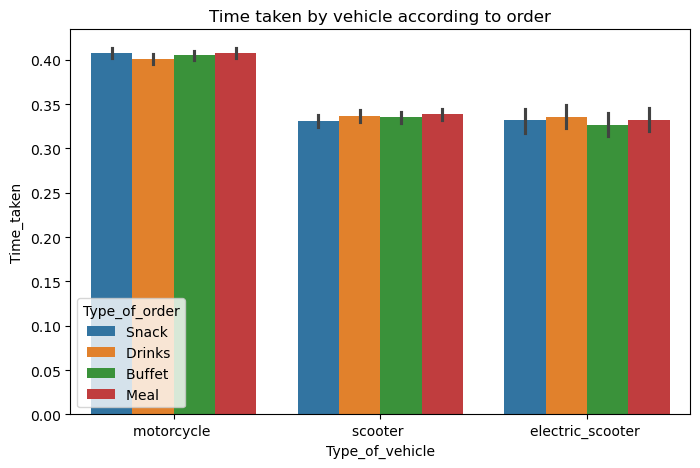

In [259]:
plt.figure(figsize=(8,5))
sns.barplot(x='Type_of_vehicle',y='Time_taken',hue='Type_of_order', data=df)
plt.title('Time taken by vehicle according to order')

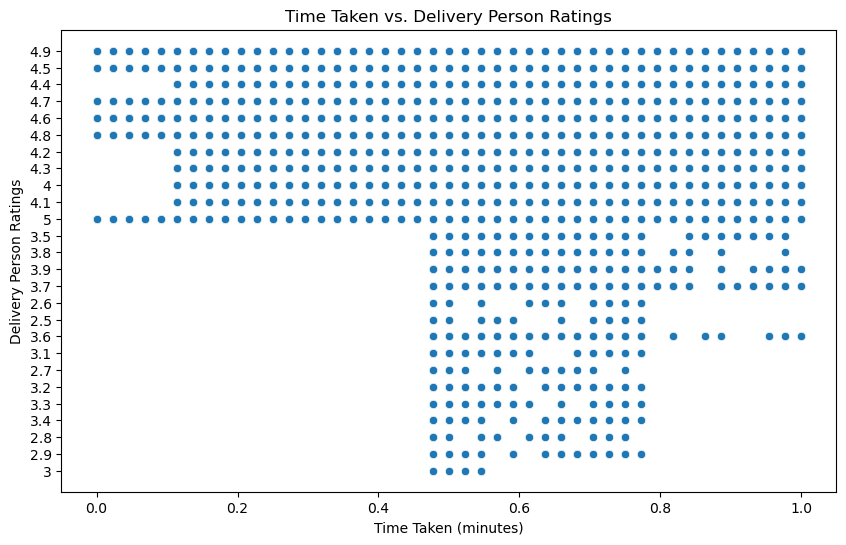

In [260]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_taken', y='Delivery_person_Ratings', data=df)
plt.title('Time Taken vs. Delivery Person Ratings')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Delivery Person Ratings')
plt.show()

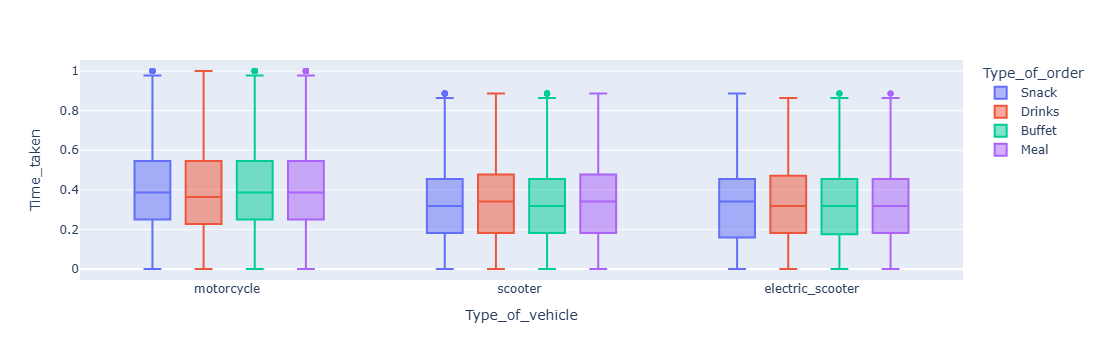

In [261]:
fig = px.box(df,
             x="Type_of_vehicle",
             y="Time_taken",
             color="Type_of_order")
fig.show()

<Axes: xlabel='City', ylabel='count'>

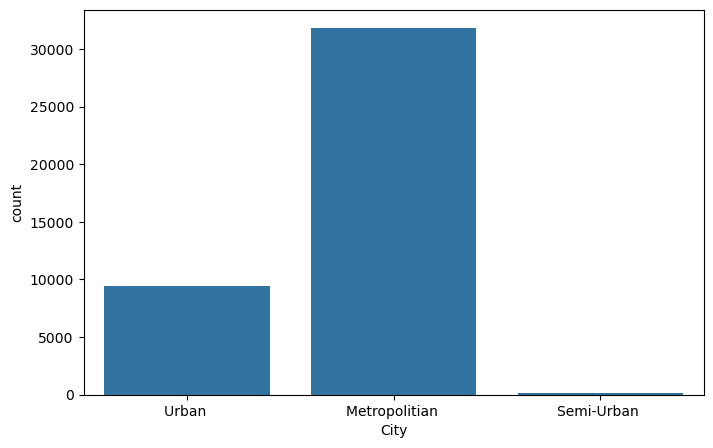

In [267]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x= 'City')

Text(0.5, 1.0, 'Time taken by road traffic density')

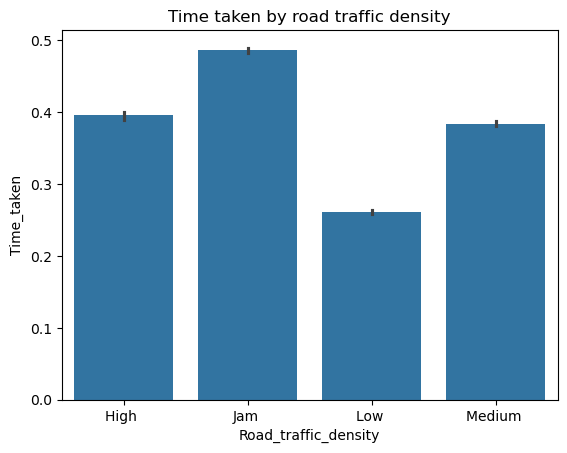

In [272]:
sns.barplot(data = df,x='Road_traffic_density',y='Time_taken')
plt.title('Time taken by road traffic density')

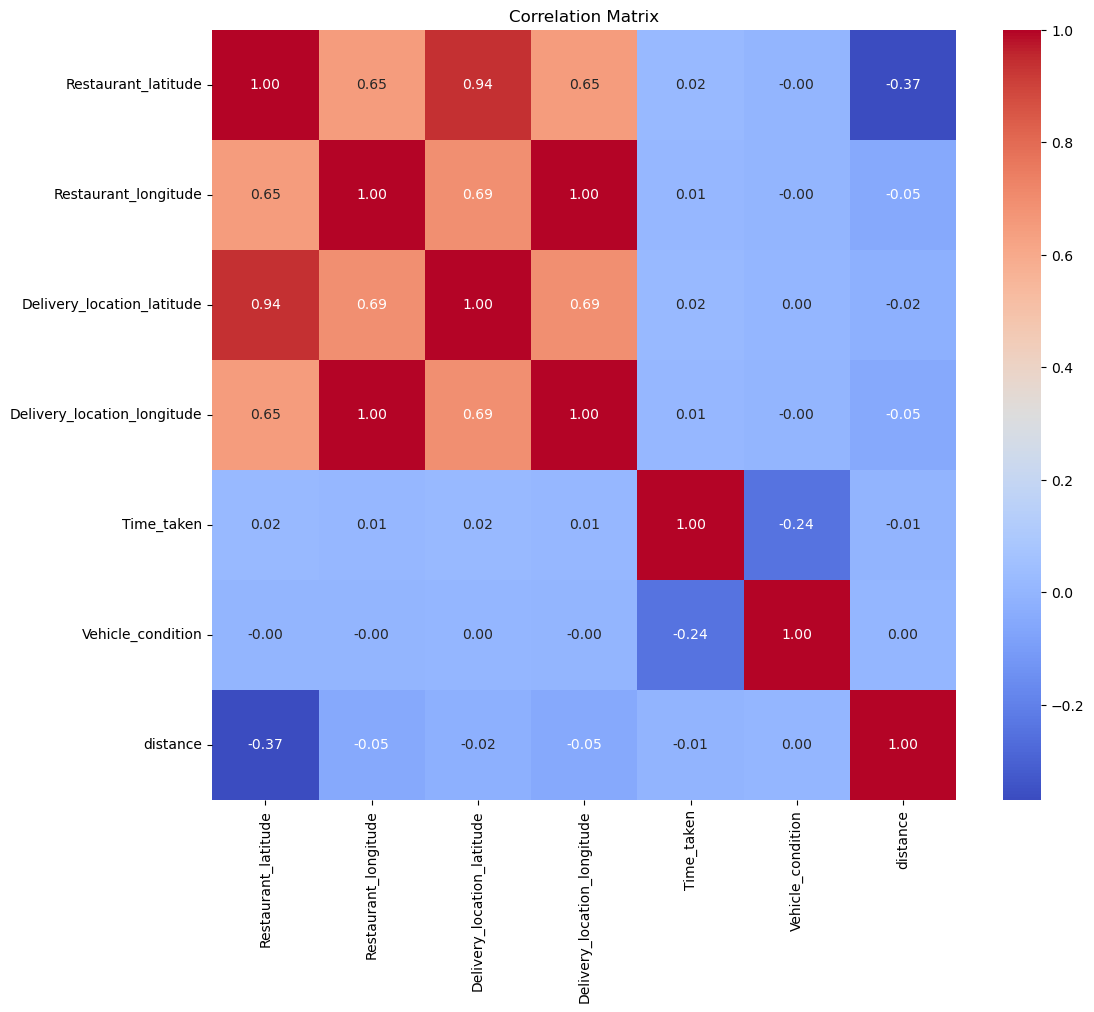

In [275]:
# Correlation Matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [279]:
df['Delivery_person_Age']=df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype(float)

In [281]:
# Converting order_date dtype into datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')

In [285]:
# Converting time_order dtype into datetime
df['Time_Orderd']=pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S')

In [287]:
# Converting time_order_picked dtype into datetime
df['Time_Order_picked']=pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S')

In [289]:
x= df.drop(['Delivery_person_ID','Order_Date','Time_Orderd','Time_Order_picked','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Time_taken'],axis=1)
y= df.Time_taken

In [291]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [293]:
x_train.select_dtypes(include='object').columns

Index(['Type_of_order', 'Type_of_vehicle', 'Weatherconditions',
       'Road_traffic_density', 'multiple_deliveries', 'Festival', 'City'],
      dtype='object')

In [295]:
from sklearn.preprocessing import OrdinalEncoder

In [297]:
OE = OrdinalEncoder()

In [299]:
OE

OrdinalEncoder()

In [303]:
x_train[['Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City']] = OE.fit_transform(x_train[['Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City']])

In [307]:
x_test[['Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City']] = OE.transform(x_test[['Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City']])

In [309]:
# Create StandardScaler 
from sklearn.preprocessing import StandardScaler

In [311]:
SS = StandardScaler()

In [313]:
SS

StandardScaler()

In [315]:
SS.fit(x_train)

StandardScaler()

In [319]:
x_train = SS.fit_transform(x_train)
x_test = SS.transform(x_test)

In [321]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [323]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()

In [325]:
LR

LinearRegression()

In [327]:
DTR

DecisionTreeRegressor()

In [331]:
RFR

RandomForestRegressor()

In [333]:
LR.fit(x_train,y_train)
DTR.fit(x_train,y_train)
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [335]:
lr_pred = LR.predict(x_test)
dtr_pred = DTR.predict(x_test)
rfr_pred = RFR.predict(x_test)

In [337]:
from sklearn.metrics import r2_score

In [339]:
print(r2_score(y_test,lr_pred))
print(r2_score(y_test,dtr_pred))
print(r2_score(y_test,rfr_pred))

0.43484008180477074
0.5182023902028552
0.7428849197934515


In [343]:
LR.score(x_test,y_test)

0.43484008180477074

In [353]:
LR.score(x_train,y_train)

0.4360696458649669

In [349]:
DTR.score(x_train,y_train)

0.9999953786415857

In [351]:
DTR.score(x_test,y_test)

0.5182023902028552

In [357]:
RFR.score(x_test,y_test)

0.7428849197934515

In [355]:
RFR.score(x_train,y_train)

0.9632322118014398